<a href="https://colab.research.google.com/github/KhinMyatNandar/Fraud-Detection/blob/main/Tomeklinks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
CCFD= pd.read_csv('/content/new_creditcard.csv')

In [ ]:
df=pd.DataFrame(CCFD)

In [ ]:
X=df.drop('Class', axis=1)
y=df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
tomek= TomekLinks()

In [ ]:
# Apply Tomek Links to the training data
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)


In [ ]:
# Display the new class distribution
print('Original dataset shape:', Counter(y_train))
print('Tomek dataset shape:', Counter(y_train_tomek))

Original dataset shape: Counter({0: 198269, 1: 339})
Tomek dataset shape: Counter({0: 198250, 1: 339})


Text(0.5, 1.0, 'Class Distribution after Tomek Links')

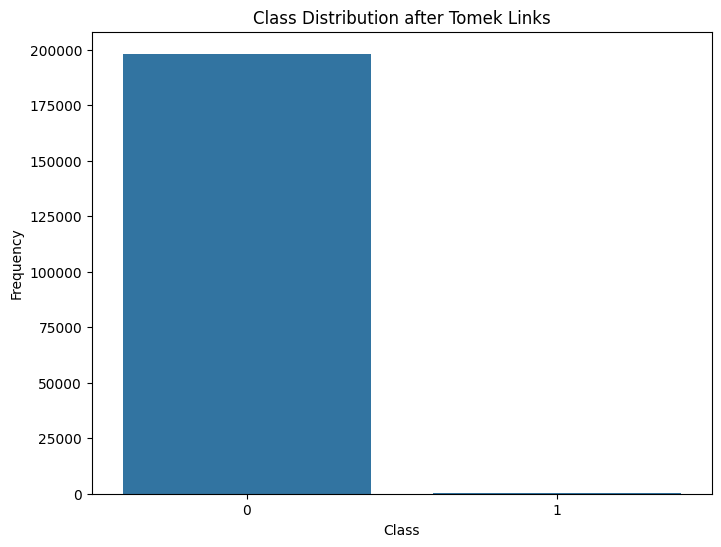

In [ ]:
#plot the class distribution after SMOTE_ENN
tomek_distribution = Counter(y_train_tomek)
plt.figure(figsize=(8, 6))
sns.barplot(x=list(tomek_distribution.keys()), y=list(tomek_distribution.values()))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution after Tomek Links')

In [ ]:
# Defining the models
models={
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
for i in range(len(list(models))):
  #model= list(models.values())[i]#youtube
    model_name=list(models.keys())[i]
    model=list(models.values())[i]
    #print(f"Training {model}...") #to ensure loop is worked
    model.fit(X_train_tomek, y_train_tomek)#train model


#predictions
    y_train_pred_tomek= model.predict(X_train_tomek)
    y_test_pred_tomek= model.predict(X_test)
    y_test_proba_tomek= model.predict_proba(X_test)[:,1]#needed for AUC and AUPRC


    #Training set performance
    tomek_train_precision= precision_score(y_train_tomek, y_train_pred_tomek)
    tomek_train_recall= recall_score(y_train_tomek, y_train_pred_tomek)
    tomek_train_f1_score= f1_score(y_train_tomek, y_train_pred_tomek, average='weighted')
    tomek_train_roc_auc= roc_auc_score(y_train_tomek, y_train_pred_tomek)
    tomek_train_auprc= average_precision_score(y_train_tomek, y_train_pred_tomek)

        #Testing set performance
    tomek_test_precision= precision_score(y_test, y_test_pred_tomek)
    tomek_test_recall= recall_score(y_test, y_test_pred_tomek)
    tomek_test_f1_score= f1_score(y_test, y_test_pred_tomek, average='weighted')
    tomek_test_roc_auc= roc_auc_score(y_test, y_test_pred_tomek)
    tomek_test_auprc= average_precision_score(y_test, y_test_pred_tomek)

        #print(list(models.keys())[i])
    print(f"Model:{model_name}")
    print('Model performace for Training set with tomek')
    print("- Precision : {:.4f}".format(tomek_train_precision))
    print("- Recall : {:.4f}".format(tomek_train_recall))
    print("- F1 Score : {:.4f}".format(tomek_train_f1_score))
    print("- AUC-ROC : {:.4f}".format(tomek_train_roc_auc))
    print("- AUPRC : {:.4f}".format(tomek_train_auprc))

    print('----------------------------------')

    print('Model performace for Testing set with tomek')
    print("- Precision : {:.4f}".format(tomek_test_precision))
    print("- Recall : {:.4f}".format(tomek_test_recall))
    print("- F1 Score : {:.4f}".format(tomek_test_f1_score))
    print("- AUC-ROC : {:.4f}".format(tomek_test_roc_auc))
    print("- AUPRC : {:.4f}".format(tomek_test_auprc))

    print('='*35)
    print('\n')

Model:Logistic Regression
Model performace for Training set with tomek
- Precision : 0.8760
- Recall : 0.6254
- F1 Score : 0.9991
- AUC-ROC : 0.8126
- AUPRC : 0.5485
----------------------------------
Model performace for Testing set with tomek
- Precision : 0.8667
- Recall : 0.5821
- F1 Score : 0.9991
- AUC-ROC : 0.7910
- AUPRC : 0.5051


Model:XGBoost
Model performace for Training set with tomek
- Precision : 1.0000
- Recall : 1.0000
- F1 Score : 1.0000
- AUC-ROC : 1.0000
- AUPRC : 1.0000
----------------------------------
Model performace for Testing set with tomek
- Precision : 0.9252
- Recall : 0.7388
- F1 Score : 0.9995
- AUC-ROC : 0.8694
- AUPRC : 0.6840


Model:K-Nearest Neighbors
Model performace for Training set with tomek
- Precision : 0.9577
- Recall : 0.8024
- F1 Score : 0.9996
- AUC-ROC : 0.9011
- AUPRC : 0.7688
----------------------------------
Model performace for Testing set with tomek
- Precision : 0.9245
- Recall : 0.7313
- F1 Score : 0.9995
- AUC-ROC : 0.8656
- AUP